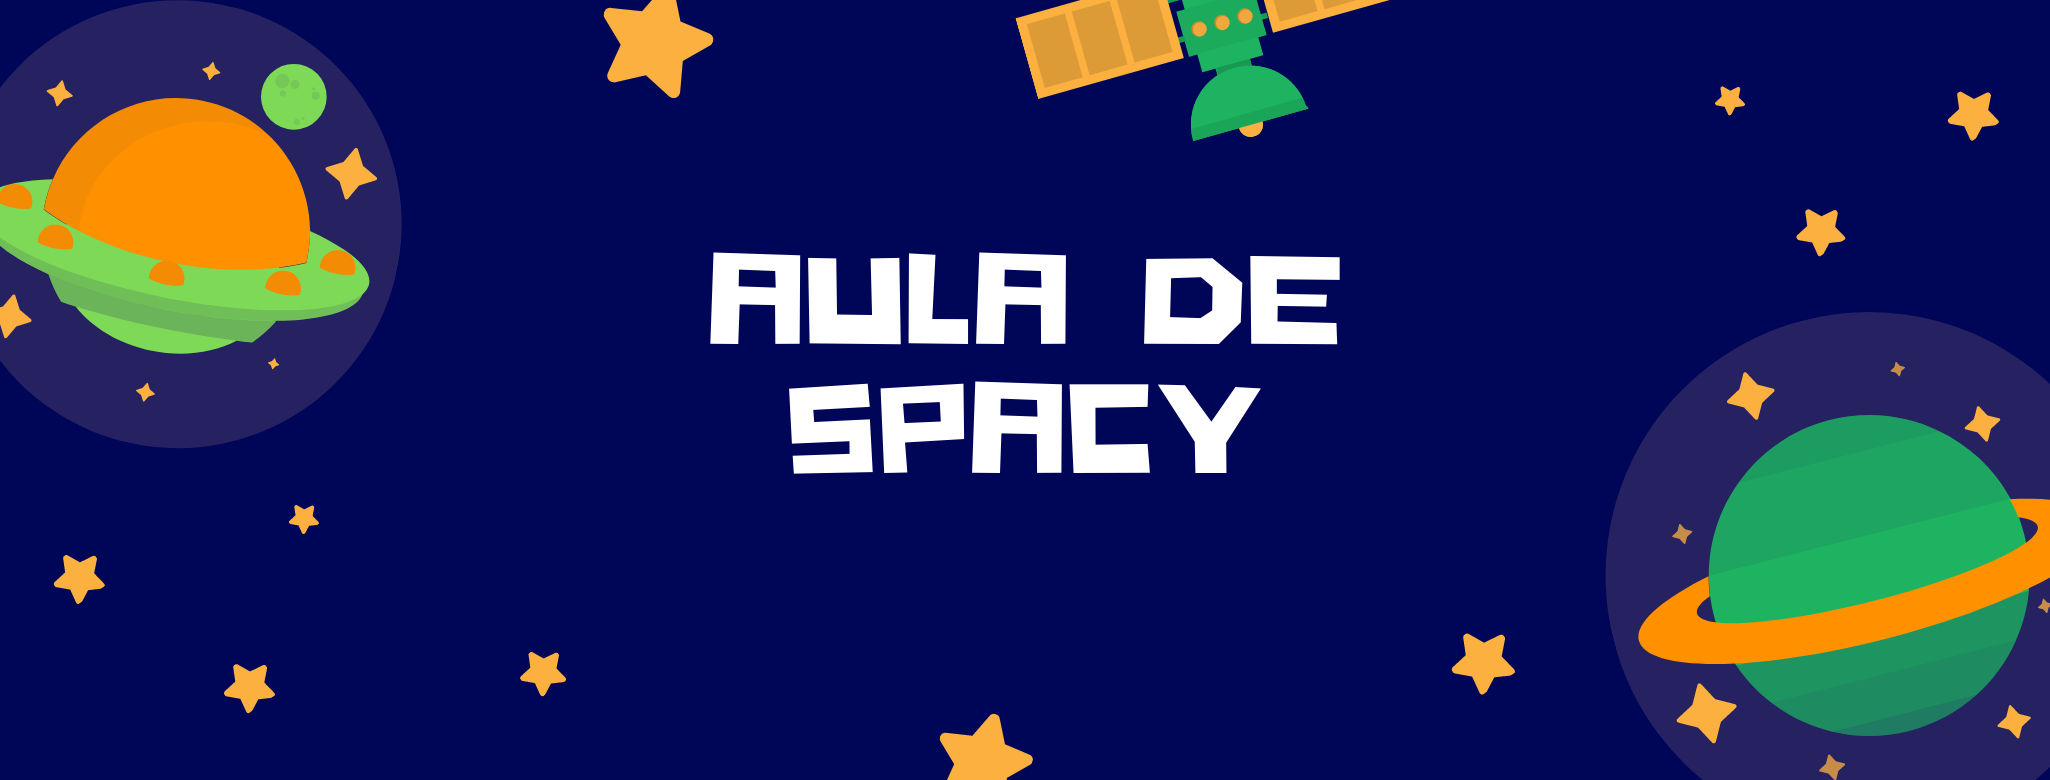

## Instalação

Para começar a usar o SpaCy precisamos importar a biblioteca e em seguida "carregar" a língua desejada:

In [1]:
import spacy
spc = spacy.load('en')

## Assuntos básicos

Aqui vamos usar uma frase para exemplicar cada função:

* "Apple is looking at buying U.K. startup for $1 billion"



### Tokenização

A biblioteca SpaCy possui uma função própria para tokenizar o texto:



In [ ]:
tokens = spc("Apple is looking at buying U.K. startup for $1 billion")
for token in tokens:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


[Como funciona a tokenização](https://d33wubrfki0l68.cloudfront.net/fedbc2aef51d678ae40a03cb35253dae2d52b18b/3d4b2/tokenization-57e618bd79d933c4ccd308b5739062d6.svg)

### Lemmatização

Lemmatizar um texto é transformar todas as formas conjugadas em sua raiz original. No SpaCy, podemos fazer isso usando `.lemma_`, podendo ser através de um for loop normal:

In [ ]:
tokens = spc('Apple is looking at buying U.K. startup for $1 billion')
for token in tokens:
  print(token.text, token.lemma_)

Apple Apple
is be
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


Ou uma list comprehension:

In [ ]:
lemma = [token.lemma_ for token in tokens]
lemma

['Apple',
 'be',
 'look',
 'at',
 'buy',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion']

### NER - Name Entity Recognition 

O NER, também conhecido como identificação de entidade nomeada, é uma tarefa de extração de informações que busca localizar e classificar entidades nomeadas mencionadas em um texto, como pessoas, nomes, organizações, locais, valores monetários, porcentagens, etc.É uma tarefa fundamental já que algo importante em certas tarefas de NLP é reconhecer nomes nas mensagens. Por exemplo, ao reservar voôs, você pode falar:

"Me reserve um voô de São Paulo para o Rio"

Para a compreensão, é importante saber quais palavras da frase são lugares e, além disso, saber qual é destino e qual é partida. 

In [ ]:
for ent in tokens.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


### Part-of-speech (POS) Tagging

O POS Tagging, também chamado de marcação gramatical, é o processo de marcar uma palavra em um texto (corpus) como correspondendo a uma classe gramatical específica, com base na sua definição e no seu contexto. Uma forma simplificada disso é a identificação de palavras como substantivos, verbos, adjetivos, advérbios, etc. Em outras palavras é um meio de você ter acesso às estruturas gramaticais do texto que você está analisando.

[Tabela com alguns labels.](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)



In [ ]:
for token in tokens:
    print(token.text, token.pos_, token.tag_)

Apple PROPN NNP
is AUX VBZ
looking VERB VBG
at ADP IN
buying VERB VBG
U.K. PROPN NNP
startup NOUN NN
for ADP IN
$ SYM $
1 NUM CD
billion NUM CD


Utilizando `spacy.explain` podemos ter acesso ao significado de cada uma dessas labels:

In [ ]:
spacy.explain("NNP")

'noun, proper singular'

In [ ]:
spacy.explain("SYM")

'symbol'

### Sentence Boundary Detection (SBD)

SDB é uma forma de detectarmos o "limite" das sentenças, no caso onde termina uma frase e começa outra, vamos ver como fazer isso:

In [ ]:
nlp = spacy.load("en_core_web_sm")
sent = spc("Hello, world. Here are two sentences. Oh, now there is three!")
for sent in sent.sents:
  print(sent.text)

Hello, world.
Here are two sentences.
Oh, now there is three!


### Word Vectors

Para transformar o texto em vetores podemos fazer isso com as letras, pedaços de palavras, palavras, pedaços de frases ou frases inteiras. Aqui usaremos os word vectors, ou seja, transformaremos as palavras em vetores para ajudar a máquina a entendê-las mais facilmente. Dessa forma, palavras com contextos semelhantes tendem a ter um número vetorial mais parecido. 

In [ ]:
doc = spc('hello, can you help me?')

for token in doc:
  print('{} : {}'.format(token, token.vector[:3]))

hello : [-0.43925777  0.96651727  1.5806277 ]
, : [-2.1816235  3.11678   -2.648226 ]
can : [-1.1050521  0.7221676 -2.8620317]
you : [-0.3462759  3.2638645 -2.378814 ]
help : [-0.503498   2.4004774  0.4333322]
me : [ 2.19885     0.5149174  -0.47196734]
? : [-2.4404542  -0.59511113  1.0436571 ]


#### Similaridade

Para descobrir o quão similares são dois tokens podemos usar o `.similarity`:

In [ ]:
doc2 = spc('cat')
doc2.similarity(spc('dog'))

/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.6549556828973659

### Parsing Tree



In [ ]:
flight = spc('a flight from Shanguai to Singapure')

In [ ]:
shanguai, singapure = flight[3],flight[5]
list(shanguai.ancestors)

[from, flight]

In [ ]:
list(singapure.ancestors)

[to, flight]

### Matcher

Algo que é muito facilitado pelo Spacy é procurar coisas dentro do nosso texto. A ferramenta do spaCy é mais poderosa do que um simples regex, isso porque ela permite especificar coisas do tipo lemma, tags, textos e entidades, que podem ser resultados dos próprios modelos do spaCy. <br>
No exemplo abaixo, carregamos os modelos estatísticos do inglês e depois instanciamos um objeto `Matcher`. <br>
Depois, especificamos qual é o padrão que queremos encontrar. No caso, é especificada uma sequência que contenha o lemma 'love' que tem que estar taggeado como verbo e seguido de um nome próprio.

In [ ]:
import spacy
from spacy.matcher import Matcher
#load the statistical trained models from spaCy
nlp = spacy.load('en_core_web_sm')
#instantiate the matcher object
matcher = Matcher(nlp.vocab)
pattern = [{'LEMMA': 'love', 'POS': 'VERB'}, {'POS': 'PROPN'}]
matcher.add('My_pattern', None, pattern)
doc = nlp("love is hard and I loved Michel Temer")
matches = matcher(doc)
for _, start, end in matches:
  matched = doc[start:end]
  print(matched.text)

loved Michel


## Intermediário


### Pipeline

Ao instanciar um modelo numa variável em geral chamada de nlp e passar uma string para esse objeto da forma: <br>


```
nlp = spacy.load(model)
doc = nlp(texto)
```
O que acontece debaixo dos panos é uma série de processamentos dentro de um pipeline.
<br>
**Tokenização** --> **Tagger** --> **Parser** --> **Ner** --> ... --> **Doc**
<br>
Alguns pré-processamentos vem por padrão no pipe do SpaCy, mas é possível adicionar elementos customizáveis. Para tal, é necessário criar uma função que especifica o que será feito e, então, é adicionada essa função no pipeline:


```
def funcao_customizada(doc):
  ...
  return doc

nlp.add_pipe(funcao_customizada)
```
É possível especificar em que posição se deseja adicionar a função no pipe com argumentos como `after`, `before`, `first` e `last`




In [ ]:
from spacy.tokens import Span

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER': 'ednaldo'}, {'LOWER': 'pereira'}]
matcher.add('ENALDO_PATTERN', None, pattern)

def acha_ednaldo_pereira(doc):
    doc.ents = [Span(doc, start, end, label='LENDA')
                for match_id, start, end in matcher(doc)]
    return doc
    
# Add the component to the pipeline before the 'ner' component 
nlp.add_pipe(acha_ednaldo_pereira, before='ner')

# Process the text and print the text and label for the doc.ents
doc = nlp("Ednaldo Pereira is a singer that lives in Brazil and rules the NU")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Ednaldo Pereira', 'LENDA'), ('Brazil', 'GPE'), ('NU', 'ORG')]


## Treinando e atualizando um modelo

In [8]:
#!python3 -m spacy download pt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
from spacy.matcher import Matcher
import nltk
import random
nlp_pt = spacy.load('pt')

In [6]:
with open('resenha.txt', 'r', encoding='utf-8') as arq:
    resenha = arq.read()

In [9]:
frases_resenha = nltk.sent_tokenize(resenha)

### Exemplo: Treinando o Entity Recognizer
1 Token = 1 entidade

Os exemplos fornecidos precisam vir com contexto. Textos sem entidades também precisam ser fornecidos:
```
("iPhone X is coming", {'entities': [(0, 8, 'GADGET')]})

("I need a new phone! Any tips?", {'entities': []})
```
O objetivo é ensinar o modelo a generalizar

#### 1. Criando os dados de treino com o Matcher
Atualizar um modelo existente: centenas-milhares de exemplos
Treinar uma nova categoria: milhares-milhões de exemplos
Podemos semi-automatizar o processo usando o Matcher:

In [12]:
matcher = Matcher(nlp_pt.vocab)

# A forma minúscula da palavra deve bater com 'capitu'
pattern = [{'LOWER' : 'capitu'}]

# Adicionando o padrão ao Matcher
matcher.add('PERSONAGEM', None, pattern)

In [13]:
TRAINING_DATA = []

# Cria um objeto Doc para o texto
for doc in nlp_pt.pipe(frases_resenha):
    
    # Cria uma lista com os padrões encontrados pelo match
    spans = [doc[start:end] for match_id, start, end in matcher(doc)]

    # (caractere inicial, caractere final, label) - tuplas dos matches
    entities = [(span.start_char, span.end_char, 'PERSONAGEM') for span in spans]

    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {'entities': entities})

    # Append the example to the training data
    TRAINING_DATA.append(training_example)

#### 2. Treinando o modelo
Se quiséssemos treinar uma aplicação do zero, poderíamos utilizar o seguinte código: 
```
# Cria um novo modelo 'em branco'
nlp = spacy.blank("en")

# Adiciona o NER na pipeline 
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# Adiciona uma nova label no NER
ner.add_label('GADGET')
```
Como não temos tantos dados assim, aqui, vamos reaproveitar o modelo em português do spacy. Para fazer isso, seguimos os seguintes passos: 
1. Carregue um modelo da biblioteca spacy usando `spacy.load` com o ID do idioma. Lembre-se de desabilitar os outros componentes da pipeline usando `nlp.disable_pipes`. Assim, você só estará treinando o NER. 
2. Adicione a nova entidade usando `add_label`. Você pode acessar o NER na pipeline usando `nlp.get_pipe('ner')` 
3. Itere sobre os exemplos usando `nlp.update` . Depois de cada palavra, o modelo fará uma previsão. Em seguida, ele consulta as anotações fornecidas para saber se a previsão foi correta ou errada. A partir disso, os pesos do modelo são ajustados.

In [14]:
# Desabilita outros componentes da pipeline (só queremos treinar o NER)
nlp_pt.disable_pipes('tagger', 'parser')

# Selecionado o NER
ner = nlp_pt.get_pipe('ner')

# Adiciona a label 'PERSONAGEM' no entity recognizer 
ner.add_label('PERSONAGEM')

# Inicia o treino 
nlp_pt.begin_training()

for i in range(10):
    
    # Embaralha os dados de treino
    random.shuffle(TRAINING_DATA)
    
    # Cria batches e itera sobre elas 
    for batch in spacy.util.minibatch(TRAINING_DATA):
        
        # Separa a batch em 'texts' e 'ents'
        texts = [text for text, ents in batch]
        annotations = [ents for text, ents in batch]
        
        # Atualiza o modelo
        nlp_pt.update(texts, annotations)

#### 3. Testando o modelo

In [ ]:
TEST_DATA = ['Nada me tira da cabeça que Bentinho era um perturbado das ideias e imaginou demais',
             'Pensa: 117 anos depois, ainda estamos discutindo isso HAHAHAHA Machado está muito orgulhoso, onde estiver. Eu sou time Capitu, mas penso q ela pode ter combinado com o Escobar uma "ajuda" pra engravidar, achando q o Bentinho não podia e ia ficar muito mal com isso. Acho q o Bentinho tinha ciume do Escobar porq ele era tudo q ele queria ser como homem e como marido, não senti tanto homossexualidade... acho que o Bentinho era tão sem sal, que ele "endeusava" o Escobar.',
             'Tenho uma teoria sem pé nem cabeça mas vamos lá: E se Capitu usou Escobar para ter um filho e deixar Bentinho feliz? Até porque ela e Bentinho após várias tentativas não estavam conseguindo conceber um filho e isso deixava ele bem frustado (pelo o me lembre, por favor me corrijam se estiver errada haha)',
             'Bentinho que traiu Capitu',
             'Eu acho Dom Casmurro genial! Além de ser um livro delicioso de ler. Agora, que Capitu traiu Bentinho, traiu sim. Ela até admite a semelhança entre o filho e o Escobar. Essa polêmica me lembra a famosa frase de Dalton Trevisan: "Se Capitu não traiu Bentinho, então Machado de Assis se chamava José de Alencar". Além disso, eu acho que a mulher de Escobar sabia da traição. Há um episódio, pouco explorado pelos leitores, que é o flerte entre a Sancha e o Bentinho. Para mim, isso indica que ela tinha consciência do caso entre o marido e Capitu, e queria igualar o jogo. Eu admito que é uma teoria meio louca, mas...']

In [ ]:
# Fazendo as previsões com os dados de treino 
for doc in nlp_pt.pipe(TEST_DATA):
    
    # Mostra o texto e as entidades 
    print(doc.text)
    print([(ent.text, ent.label_) for ent in doc.ents], '\n\n')